# all_MAPE

### MAPE predicted moving totalpower

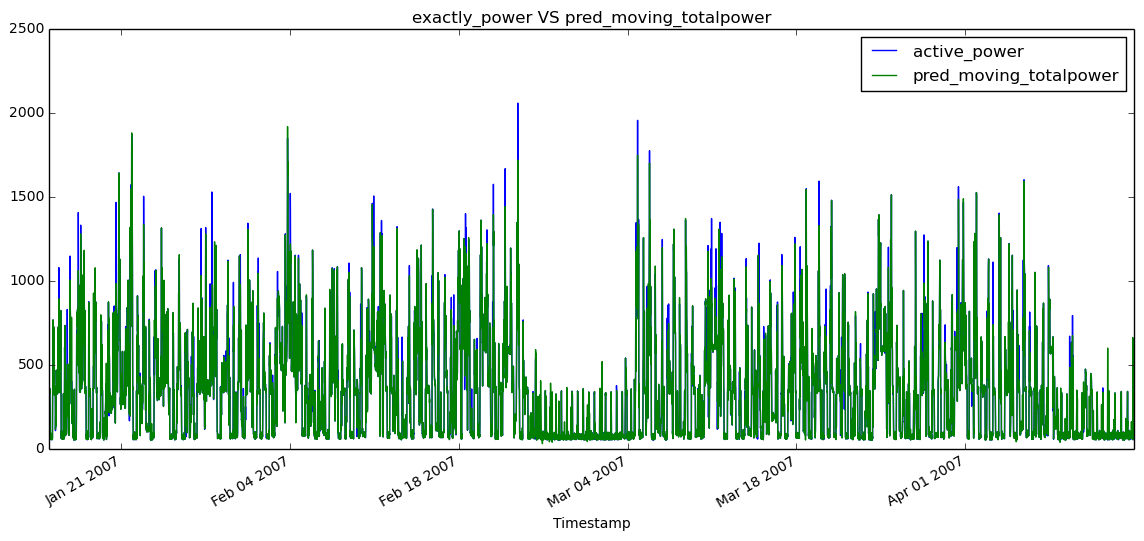

% MEAN ABSOLUTE PERCENT ERROR : 3.92468064076 %
Size of Data_excatly_load:  8640  Day = 90
Size of Data_pred_load   :  8640  Day = 90


In [37]:
import matplotlib.pyplot as plt
import pandas as pd # v. 1.7
import MySQLdb
import numpy as np
import time
import sys
import datetime 
from datetime import datetime
from sympy import *
from sympy.solvers import solve
from sympy.parsing.sympy_parser import parse_expr
from sklearn.metrics import mean_absolute_error,mean_squared_error
import statistics 
%matplotlib inline


conn = MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

# query_holt_sub = "SELECT * FROM prediction.Holtsumsub_15T WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2007-01-15 00:00:00","2007-01-16 23:59:59")
# df_holt_sub = pd.read_sql(query_holt_sub , conn , index_col=['Timestamp'])

query_totalpower = "SELECT * FROM prediction.pred_moving_totalpower WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2007-01-15 00:00:00","2007-04-14  23:59:59")
df_totalpower = pd.read_sql(query_totalpower, conn , index_col=['Timestamp'])

query = "SELECT Timestamp, active_power FROM prediction.data15min_4y WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2007-01-15 00:00:00","2007-04-14 23:59:59")
df = pd.read_sql(query, conn , index_col=['Timestamp'])

# df['holtsub'] = df_holt_sub.watt_sumsub
df['pred_moving_totalpower'] = df_totalpower.watt
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_title('exactly_power VS pred_moving_totalpower')
df.plot(ax=ax)
plt.show()


from sklearn.metrics import mean_absolute_error,mean_squared_error
df.APE = (np.abs((df.active_power-df_totalpower.watt)/df.active_power))*100
MAPE = np.mean(df.APE)
# df.to_csv('out.csv')

print "% MEAN ABSOLUTE PERCENT ERROR :",MAPE, "%"
print "Size of Data_excatly_load: ", len(df) , " Day =", len(df)/96
print "Size of Data_pred_load   : ", len(df_totalpower) , " Day =", len(df_totalpower)/96

### MAPE predicted moving meterall

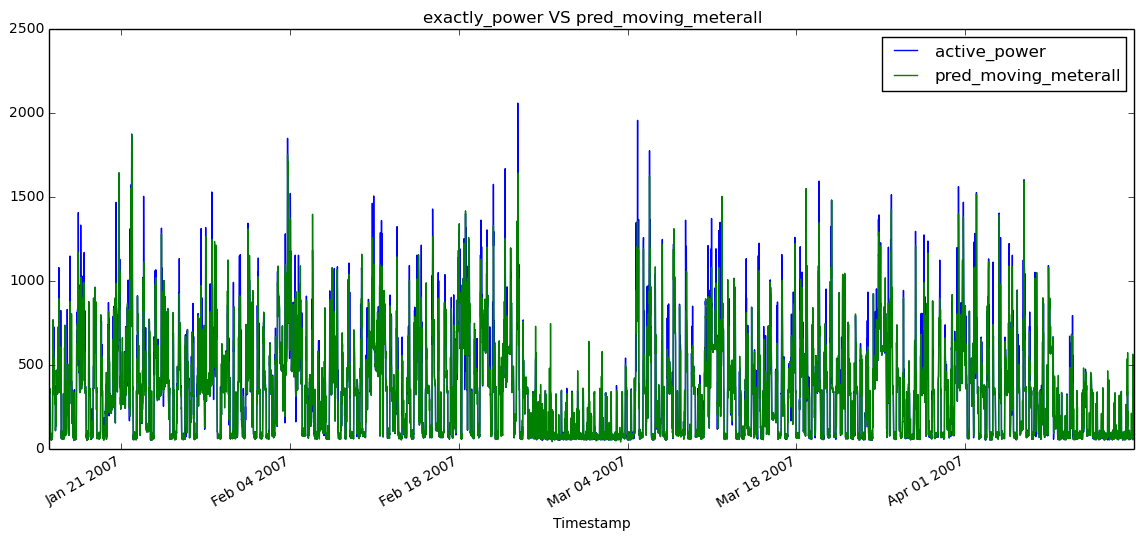

% MEAN ABSOLUTE PERCENT ERROR : 7.80401302539 %
Size of Data_excatly_load:  8640  Day = 90
Size of Data_pred_load   :  8640  Day = 90


In [38]:
from sklearn.metrics import mean_squared_error

conn = MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

query_mtall = "SELECT * FROM prediction.pred_moving_mtall WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2007-01-15 00:00:00","2007-04-14 23:59:59")
df_mtall = pd.read_sql(query_mtall, conn , index_col=['Timestamp'])


query = "SELECT Timestamp, active_power FROM prediction.data15min_4y WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2007-01-15 00:00:00","2007-04-14 23:59:59")
df = pd.read_sql(query, conn ,index_col=['Timestamp'])


df['pred_moving_meterall'] = df_mtall.watt_sumsub
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_title('exactly_power VS pred_moving_meterall')
df.plot(ax=ax)
plt.show()

from sklearn.metrics import mean_absolute_error,mean_squared_error
df.APE = (np.abs((df.active_power - df_mtall.watt_sumsub)/df.active_power))*100
MAPE = np.mean(df.APE)
# df.to_csv('out.csv')

print "% MEAN ABSOLUTE PERCENT ERROR :",MAPE, "%"
print "Size of Data_excatly_load: ", len(df) , " Day =", len(df)/96
print "Size of Data_pred_load   : ", len(df_mtall) , " Day =", len(df_mtall)/96



DONE!


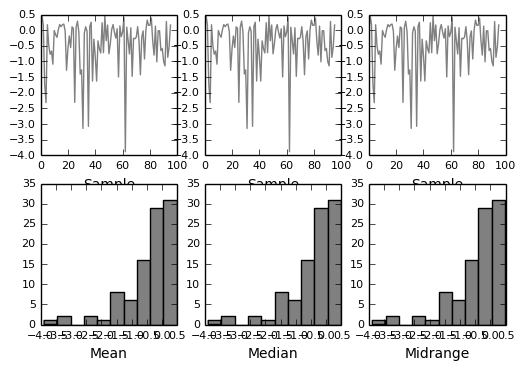

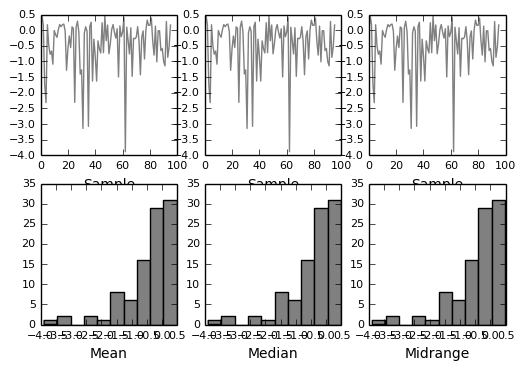

In [33]:
import matplotlib.pyplot as plt
import pandas as pd # v. 1.7
import MySQLdb
import numpy as np
import time
import sys
import datetime 
from datetime import datetime
from sympy import *
from sympy.solvers import solve
from sympy.parsing.sympy_parser import parse_expr
from sklearn.metrics import mean_absolute_error,mean_squared_error
import statistics 
%matplotlib inline
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

conn = MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

query_mtall = "SELECT * FROM prediction.pred_moving_mtall WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2007-01-15 00:00:00","2007-01-17 23:59:59")
df_mtall = pd.read_sql(query_mtall, conn , index_col=['Timestamp'])

query = "SELECT Timestamp, active_power FROM prediction.data15min_4y WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2007-01-15 00:00:00","2007-01-17 23:59:59")
df = pd.read_sql(query, conn ,index_col=['Timestamp'])
i = 0
error = []
while i<= len(df_mtall.watt_sumsub)-1:
    cal_error = (df.active_power[i]-df_mtall.watt_sumsub[i])/df.active_power[i]
    error.append(cal_error)
    i+=1
print "DONE!"
# print error
# print max(error)
# print min(error)

# from pandas.tools.plotting import bootstrap_plot
# data = [error]
# bootstrap_plot(data, size=50, samples=500, color='grey')
import matplotlib.pyplot as plt
from pandas.tools.plotting import bootstrap_plot
df = pd.DataFrame(error)
bootstrap_plot(df, size=2, samples=96, color='grey')

    

### MAPE predicted expanding totalpower

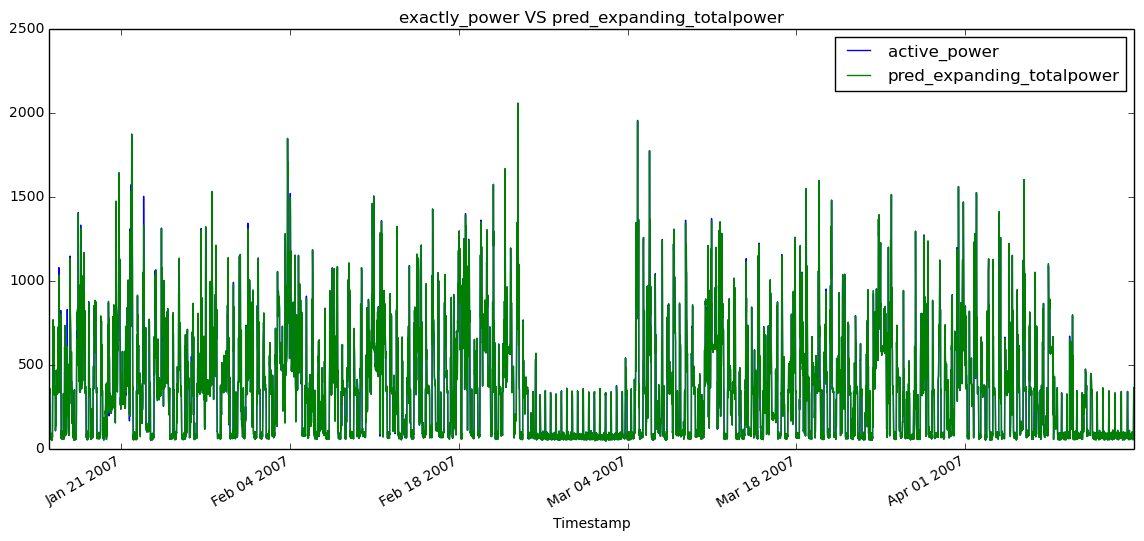

% MEAN ABSOLUTE PERCENT ERROR : 0.360794806142 %
Size of Data_excatly_load:  8640  Day = 90
Size of Data_pred_load   :  8640  Day = 90


In [39]:
conn = MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

query_totalpower = "SELECT * FROM prediction.pred_expand_totalpower WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2007-01-15 00:00:00","2007-04-14  23:59:59")
df_totalpower = pd.read_sql(query_totalpower, conn , index_col=['Timestamp'])

query = "SELECT Timestamp, active_power FROM prediction.data15min_4y WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2007-01-15 00:00:00","2007-04-14 23:59:59")
df = pd.read_sql(query, conn , index_col=['Timestamp'])

# df['holtsub'] = df_holt_sub.watt_sumsub
df['pred_expanding_totalpower'] = df_totalpower.watt
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_title('exactly_power VS pred_expanding_totalpower')
df.plot(ax=ax)
plt.show()


from sklearn.metrics import mean_absolute_error,mean_squared_error
df.APE = (np.abs((df.active_power-df_totalpower.watt)/df.active_power))*100
MAPE = np.mean(df.APE)
# df.to_csv('out.csv')

print "% MEAN ABSOLUTE PERCENT ERROR :",MAPE, "%"
print "Size of Data_excatly_load: ", len(df) , " Day =", len(df)/96
print "Size of Data_pred_load   : ", len(df_totalpower) , " Day =", len(df_totalpower)/96

### MAPE predicted expanding meterall

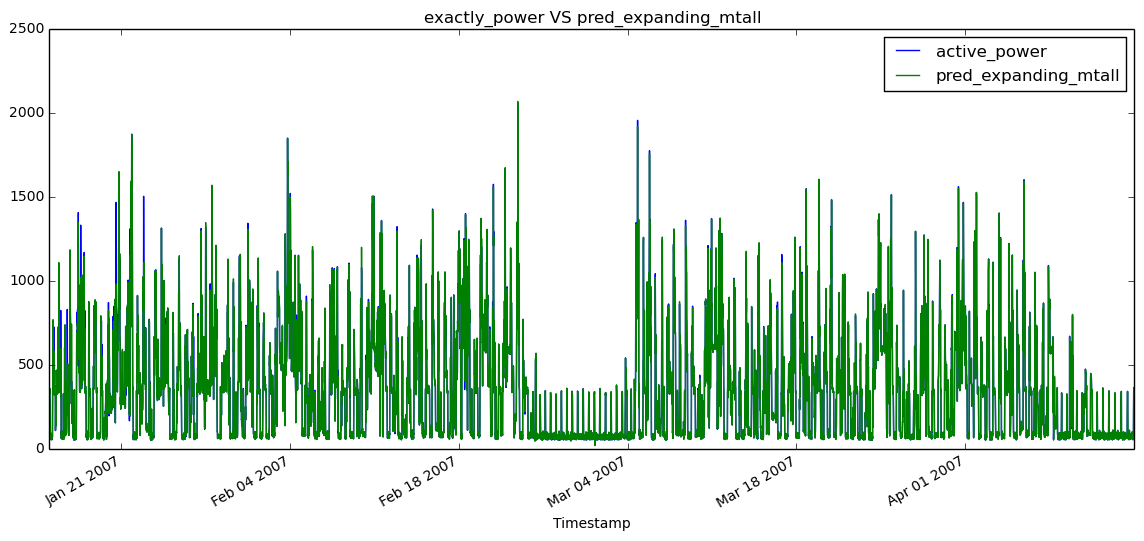

% MEAN ABSOLUTE PERCENT ERROR : 0.680699766644 %
Size of Data_excatly_load:  8640  Day = 90
Size of Data_pred_load   :  8640  Day = 90


In [40]:
from sklearn.metrics import mean_squared_error

conn = MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

query_mtall = "SELECT * FROM prediction.pred_expand_mtall WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2007-01-15 00:00:00","2007-04-14 23:59:59")
df_mtall = pd.read_sql(query_mtall, conn , index_col=['Timestamp'])


query = "SELECT Timestamp, active_power FROM prediction.data15min_4y WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2007-01-15 00:00:00","2007-04-14 23:59:59")
df = pd.read_sql(query, conn ,index_col=['Timestamp'])


df['pred_expanding_mtall'] = df_mtall.watt_sumsub
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_title('exactly_power VS pred_expanding_mtall')
df.plot(ax=ax)
plt.show()

from sklearn.metrics import mean_absolute_error,mean_squared_error
df.APE = (np.abs((df.active_power - df_mtall.watt_sumsub)/df.active_power))*100
MAPE = np.mean(df.APE)
# df.to_csv('out.csv')

print "% MEAN ABSOLUTE PERCENT ERROR :",MAPE, "%"
print "Size of Data_excatly_load: ", len(df) , " Day =", len(df)/96
print "Size of Data_pred_load   : ", len(df_mtall) , " Day =", len(df_mtall)/96